In [ ]:
import cv2
import numpy as np

# Translation

This is the simple translation along x-axis and y-axis uisng opencv.


We use cv2.warpAffine() function to implement the translation

In [ ]:

image = cv2.imread('images/tiger.jpeg')

height, width = image.shape[:2]

one_third_height, one_third_width = height/3, width/3

matrix =np.array([
    [1,0,one_third_height],
    [0,1,one_third_width]
])

image_translation = cv2.warpAffine(image,matrix,(height,width))

cv2.imshow('translated Image',cv2.resize(image_translation, (300,300),interpolation=cv2.INTER_AREA))
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
# translation matrix
matrix

# Rotation 

Opencv allows you to rotate and scale at the same time using the function


***cv2.getRotationMatrix2D((rotation_center_x, rotation_center_y),angle_of_rotation,scale)***

In [ ]:
image = cv2.imread('images/eiffel.jpg')
height,width = image.shape[:2]

center = (height / 2, width / 2)

rotated_matrix = cv2.getRotationMatrix2D(center, -30, 1)
rotated_image = cv2.warpAffine(image,rotated_matrix,(width,height))

cv2.imshow('rotated_image',cv2.resize(rotated_image,(300,300),interpolation = cv2.INTER_AREA))
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# rotation matrix
rotated_matrix

# Resizing and Scaling

In [ ]:
image = cv2.imread('images/eiffel.jpg')

inter_area_interpolation = cv2.resize(image,None,fx=.5,fy=.5,interpolation = cv2.INTER_AREA)
cv2.imshow('inter_area',inter_area_interpolation)

cv2.waitKey(1)

inter_lanczos4_interpolation = cv2.resize(image,(300,300),interpolation = cv2.INTER_LANCZOS4)
cv2.imshow('inter_lanczos4',inter_lanczos4_interpolation)

inter_linear_interpolation = cv2.resize(image,(300,300),interpolation = cv2.INTER_LINEAR)
cv2.imshow('inter_linear_interpolation',inter_linear_interpolation)
cv2.waitKey(0)

inter_cubic_interpolation = cv2.resize(image,None,fx=0.75, fy=0.75,interpolation = cv2.INTER_CUBIC)
cv2.imshow('inter_cubic_interpolation',inter_cubic_interpolation)
cv2.waitKey(0)

inter_nearest_interpolation = cv2.resize(image,(600,600),interpolation = cv2.INTER_NEAREST)
cv2.imshow('inter_nearest_interpolation',inter_nearest_interpolation)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Image Pyramid

-   Pyramiding image refers to either upscaling(enlarging) and downscaling(shrinking image)

-   It is a another way of resizing the image which is quite fast and easy and the output image will
    be the half of the original image,
    
-   It is quite useful while in object detection,

-   While upscaling or enlarging the downscaled image the image quality is not same as origin one.

In [ ]:
image = cv2.imread('images/tiger.jpeg')

smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)

cv2.imshow('smaller',smaller)
cv2.imshow('larger',larger)

cv2.waitKey(0)
cv2.destroyAllWindows()

# ROI

- region of interest 
- using numpy array

In [ ]:
roi_image = image[400:850, 250:1250]
cv2.imshow('roi',roi_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Addition And Substraction Of Image



- image size must be same
- simple pixelwise addition has been done by opencv

In [ ]:
image = cv2.imread('images/eiffel.jpg')

dummy_image = np.ones(image.shape, dtype='uint8') * 100

addition_image = cv2.add(image,dummy_image)
cv2.imshow('addition_image',addition_image)

substracted_image = cv2.subtract(image,dummy_image)
cv2.imshow('substracted_image',substracted_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Bitwise Operation 

In [ ]:
canvas = np.ones((300,300),dtype='uint8')
cv2.rectangle(canvas, (100,100),(250,250), 255,-2)

canvas1 = np.ones((300,300),dtype='uint8')
cv2.ellipse(canvas1,(150,250),(150,150),30,0,180,255,-1)


cv2.imshow('rectangle',canvas)
cv2.imshow('ellipse',canvas1)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
tuple(np.array(canvas.shape[:2]) / 3)

In [ ]:
# shows only where they are intersect
and_operation = cv2.bitwise_and(canvas,canvas1)

#shows the union of the two regions
or_operation = cv2.bitwise_or(canvas,canvas1)

# shows either exit by itself
xor_operation = cv2.bitwise_xor(canvas,canvas1)

#shows the opposite of the image
not_operation = cv2.bitwise_not(canvas)

cv2.imshow('and_operation',and_operation)
cv2.imshow('or_operation',or_operation)
cv2.imshow('xor_operation',xor_operation)
cv2.imshow('not_operation',not_operation)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Blurring

In [ ]:
image = cv2.imread('images/tiger.jpeg')
image = cv2.resize(image,(500,500),interpolation= cv2.INTER_AREA)

kernel_3x3 = 1/9 * np.ones((3,3),dtype='uint8')
average_blur = cv2.filter2D(image,-1,kernel_3x3)

cv2.imshow('image',image)
cv2.imshow('average_filter', average_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image = cv2.imread('images/tiger.jpeg')
image = cv2.resize(image,(500,500),interpolation= cv2.INTER_AREA)


blur = cv2.blur(image,(7,7))
cv2.imshow('blur', blur)
cv2.waitKey(0)


gaussian_blur = cv2.GaussianBlur(image,(7,7),0)
cv2.imshow('gaussian_blur', gaussian_blur)
cv2.waitKey(0)

#very effective in noise removal while keeping edges sharp
#it is very slow compared to most filters.
bilateral_blur = cv2.bilateralFilter(image,9,75,75)
cv2.imshow('bilateral_blur', bilateral_blur)
cv2.waitKey(0)

cv2.destroyAllWindows()


# Sharpening

- By altering the kernel we can implement sharpening which help to strengthening the edges of an image

In [ ]:
image = cv2.imread('images/tiger.jpeg')
image = cv2.resize(image,(500,500),interpolation= cv2.INTER_AREA)

kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

sharpen_image = cv2.filter2D(image,-1,kernel)
cv2.imshow('sharpen_image', sharpen_image)
cv2.waitKey(0)

cv2.destroyAllWindows()


# Thresholding

In [ ]:
image = cv2.imread('images/tiger.jpeg',0)
image = cv2.resize(image,(500,500),interpolation= cv2.INTER_AREA)

ret,binary_thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
cv2.imshow('binary_thresh', binary_thresh)
cv2.waitKey(0)


ret,binary_inv_thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
cv2.imshow('binary_inv_thresh', binary_inv_thresh)
cv2.waitKey(0)


ret,THRESH_TRUNC = cv2.threshold(image,127,255,cv2.THRESH_TRUNC)
cv2.imshow('THRESH_TRUNC', THRESH_TRUNC)
cv2.waitKey(0)


ret,THRESH_TOZERO = cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
cv2.imshow('THRESH_TOZERO', THRESH_TOZERO)
cv2.waitKey(0)


ret, THRESH_TOZERO_INV = cv2.threshold(image,127,255,cv2.THRESH_TOZERO_INV)
cv2.imshow('THRESH_TOZERO_INV', THRESH_TOZERO_INV)
cv2.waitKey(0)

ret, THRESH_OTSU = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
cv2.imshow('otsu compute THRESH_OTSU', THRESH_OTSU)
print('thresh value',ret)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Adaptive Thresholding

*** cv2.adaptiveThreshold(image, max value, adaptive type, threshold type, block size, constant that is substracted from mean ***

- Block size must be odd number
- adaptive thresholding type:
        - cv2.ADAPTIVE_THREH_MEAN_C
        - cv2.ADAPTIVE_THRESH_GAUSSIAN_C

In [ ]:
image = cv2.imread('images/tiger.jpeg',0)
image = cv2.resize(image,(500,500),interpolation= cv2.INTER_AREA)

adaptive_gaussian_thresh_image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,3,5)
cv2.imshow('adaptive_gaussian_thresh_image', adaptive_gaussian_thresh_image)
cv2.waitKey(0)

adaptive_mean_thresh_image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,3,5)
cv2.imshow('adaptive_mean_thresh_image', adaptive_mean_thresh_image)
cv2.waitKey(0)

adaptive_gaussian_thresh_image_window_9 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,9,5)
cv2.imshow('adaptive_gaussian_thresh_image_window_9', adaptive_gaussian_thresh_image_window_9)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Morphological Operation

- ***Dilate***: Add pixels to the boundries of an objects in an image
- **Erode**: Remove pixels at the boundries of an objects in an image
- ***Open***: Erosion followed by Dilation
- ***close***: Dilation followed by Erosion

In [ ]:
image = cv2.imread('images/document.jpg',0)

kernel = np.ones((3,3),np.uint8)

cv2.imshow('original', image)
cv2.waitKey(0)

#erode
erode_image = cv2.erode(image,kernel, iterations=1)
cv2.imshow('erode_image', erode_image)
cv2.waitKey(0)

#dilate
dilate_image = cv2.dilate(image,kernel, iterations=1)
cv2.imshow('dilate_image', dilate_image)
cv2.waitKey(0)

#dilate
dilate_image = cv2.dilate(image,kernel, iterations=1)
cv2.imshow('dilate_image', dilate_image)
cv2.waitKey(0)

#dilate
dilate_image = cv2.dilate(image,kernel, iterations=1)
cv2.imshow('dilate_image', dilate_image)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Egde Detection

- Sobel
- Canny (best but complex implementation)
- laplacian (more noise as compare to other)

In [5]:
import cv2
import numpy as np

image = cv2.imread('images/eiffel.jpg')
height,width = image.shape[:2]

# extract sobel Edges
sobel_x = cv2.Sobel(image,cv2.CV_64F,1,0,5)
sobel_y = cv2.Sobel(image,cv2.CV_64F,0,1,5)

cv2.imshow('sobel_x',sobel_x)
cv2.waitKey(0)

cv2.imshow('sobel_y',sobel_y)
cv2.waitKey(0)


sobel = cv2.bitwise_or(sobel_x, sobel_y)
cv2.imshow('sobel',sobel)
cv2.waitKey(0)

laplacian_edge_detection = cv2.Laplacian(image,cv2.CV_64F)
cv2.imshow('laplacian_edge_detection',laplacian_edge_detection)
cv2.waitKey(0)

canny = cv2.Canny(image,20,30)
cv2.imshow('canny',canny)
cv2.waitKey(0)

cv2.destroyAllWindows()


# Perspective Transformation 

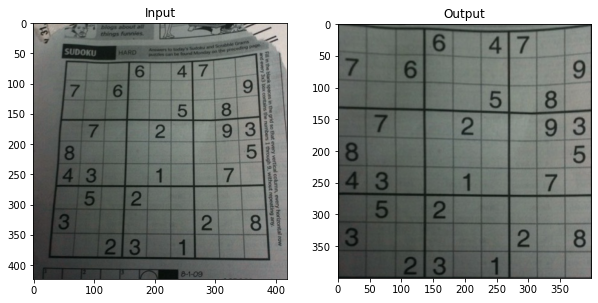

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
img = cv2.imread('images/perspective.jpg')
rows,cols,ch = img.shape


pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[400,0],[0,400],[400,400]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dest = cv2.warpPerspective(img,M,(400,400))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dest),plt.title('Output')
plt.show()